In [2]:
!pip install squarify

In [3]:
import numpy as np

import pandas as pd

import pymysql as mysql
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine

conn=mysql.connect(host='localhost',port=int(3306),user= 'sultan',passwd='sultan',db='OLIST')

In [4]:
csv_file_customer_dataset = '/Users/smsultanmahmudrahat/Downloads/department/Cloud_computing/project/csv_files/archive/customers_dataset.csv'
csv_file_geolocation_dataset = '/Users/smsultanmahmudrahat/Downloads/department/Cloud_computing/project/csv_files/archive/geolocation_dataset.csv'
csv_file_order_items_dataset = '/Users/smsultanmahmudrahat/Downloads/department/Cloud_computing/project/csv_files/archive/order_items_dataset.csv'
csv_file_order_payments_dataset = '/Users/smsultanmahmudrahat/Downloads/department/Cloud_computing/project/csv_files/archive/order_payments_dataset.csv'
csv_file_order_reviews_dataset = '/Users/smsultanmahmudrahat/Downloads/department/Cloud_computing/project/csv_files/archive/order_reviews_dataset.csv'
csv_file_orders_dataset = '/Users/smsultanmahmudrahat/Downloads/department/Cloud_computing/project/csv_files/archive/orders_dataset.csv'
csv_file_product_category_name_translation = '/Users/smsultanmahmudrahat/Downloads/department/Cloud_computing/project/csv_files/archive/product_category_name_translation.csv'
csv_file_products_dataset = '/Users/smsultanmahmudrahat/Downloads/department/Cloud_computing/project/csv_files/archive/products_dataset.csv'
csv_file_sellers_dataset = '/Users/smsultanmahmudrahat/Downloads/department/Cloud_computing/project/csv_files/archive/sellers_dataset.csv'

In [5]:
df_customer_dataset=pd.read_csv(csv_file_customer_dataset)
df_customer_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
df_customer_dataset.shape

(99441, 5)

In [10]:
# Database connection parameters
db_username = 'sultan'
db_password = 'sultan'
db_host = 'localhost'  
db_database = 'OLIST'

In [ ]:


df_customer_dataset =pd.read_csv(csv_file_customer_dataset)

engine = create_engine(f'mysql+mysqlconnector://{db_username}:{db_password}@{db_host}/{db_database}')

df_customer_dataset.to_sql('customers_dataset', con=engine, if_exists='append', index=False)



In [ ]:
df_geolocation_dataset =pd.read_csv(csv_file_geolocation_dataset)

engine = create_engine(f'mysql+mysqlconnector://{db_username}:{db_password}@{db_host}/{db_database}')

df_geolocation_dataset.to_sql('geolocation_dataset', con=engine, if_exists='replace', index=False, chunksize=10000)



-101

In [ ]:
df_order_items_dataset =pd.read_csv(csv_file_order_items_dataset)
df_order_items_dataset.shape

(112650, 7)

In [ ]:
df_order_items_dataset =pd.read_csv(csv_file_order_items_dataset)
df_order_items_dataset.to_sql('order_items_dataset', con=engine, if_exists='replace', index=False, chunksize=1000)


-113

In [ ]:
df_order_payments_dataset.shape

(103886, 5)

In [ ]:
df_order_payments_dataset =pd.read_csv(csv_file_order_payments_dataset)
df_order_payments_dataset.to_sql('order_payments_dataset', con=engine, if_exists='replace', index=False, chunksize=1000)

-104

In [ ]:
df_order_reviews_dataset =pd.read_csv(csv_file_order_reviews_dataset)
df_order_reviews_dataset.to_sql('order_reviews_dataset', con=engine, if_exists='replace', index=False, chunksize=1000)

-100

In [ ]:
df_product_category_name_translation =pd.read_csv(csv_file_product_category_name_translation)
df_product_category_name_translation.to_sql('product_category_name_translation', con=engine, if_exists='replace', index=False, chunksize=1000)

-1

In [ ]:
df_products_dataset =pd.read_csv(csv_file_products_dataset)
df_products_dataset.to_sql('products_dataset', con=engine, if_exists='replace', index=False)

-1

In [ ]:
df_sellers_dataset =pd.read_csv(csv_file_sellers_dataset)
df_sellers_dataset.to_sql('sellers_dataset', con=engine, if_exists='replace', index=False)

-1

In [ ]:
df_orders_dataset =pd.read_csv(csv_file_orders_dataset)
df_orders_dataset.to_sql('orders_dataset', con=engine, if_exists='replace', index=False)

-1

In [11]:
tableNames = pd.read_sql("""SHOW TABLES""", conn)
tableNames

/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_1632/957063789.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tableNames = pd.read_sql("""SHOW TABLES""", conn)


,Tables_in_olist
0,customers_dataset
1,geolocation_dataset
2,order_items_dataset
3,order_payments_dataset
4,order_reviews_dataset
5,orders_dataset
6,product_category_name_translation
7,products_dataset
8,sellers_dataset


In [12]:
trend_query = """
SELECT
    DATE_FORMAT(order_purchase_timestamp, '%Y-%m') AS month_year,
    COUNT(*) AS total_orders
FROM
    orders_dataset
GROUP BY
    month_year
ORDER BY
    month_year;
"""
trend_df = pd.read_sql_query(trend_query, conn)
trend_df

/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_1632/284530300.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  trend_df = pd.read_sql_query(trend_query, conn)


,month_year,total_orders
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


In [13]:
# Query 2: Seasonality Analysis
seasonality_query = """
SELECT
    DATE_FORMAT(order_purchase_timestamp, '%Y-%m') AS month_year,
    AVG(DATEDIFF(order_delivered_customer_date, order_purchase_timestamp)) AS avg_delivery_time
FROM
    orders_dataset
WHERE
    order_delivered_customer_date IS NOT NULL
GROUP BY
    month_year
ORDER BY
    month_year;
"""
seasonality_df = pd.read_sql_query(seasonality_query, conn)
seasonality_df

/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_1632/3456705326.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  seasonality_df = pd.read_sql_query(seasonality_query, conn)


,month_year,avg_delivery_time
0,2016-09,55.0000
1,2016-10,19.6111
2,2016-12,5.0000
3,2017-01,12.7533
4,2017-02,13.3001
5,2017-03,13.0444
6,2017-04,15.0230
7,2017-05,11.4271
8,2017-06,12.0128
9,2017-07,11.4889


In [16]:
query = """
SELECT 
    o.customer_id, 
    COUNT(o.order_id) AS order_count, 
    SUM(i.price) AS total_spent
FROM 
    orders_dataset o
JOIN 
    order_items_dataset i ON o.order_id = i.order_id
GROUP BY 
    o.customer_id
ORDER BY 
    total_spent DESC;
"""

df = pd.read_sql(query,conn)
print(df)



/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_1632/3384357741.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


                            customer_id  order_count  total_spent
0      1617b1357756262bfa56ab541c47bc16            8     13440.00
1      ec5b2ba62e574342386871631fafd3fc            4      7160.00
2      c6e2731c5b391845f6800c97401a43a9            1      6735.00
3      f48d464a0baaea338cb25f816991ab1f            1      6729.00
4      3fd6777bbce08a352fddd04e4a7cc8f6            1      6499.00
...                                 ...          ...          ...
98661  d2c63ad286e3ca9dd69218008d61ff81            1         2.90
98662  184e8e8e48937145eb96c721ef1f0747            1         2.29
98663  a790343ca6f3fee08112d678b43aa7c5            1         2.20
98664  161b6d415e8b3413c6609c70cf405b5a            1         0.85
98665  9f9d249355f63c5c1216a82b802452c1            1         0.85

[98666 rows x 3 columns]


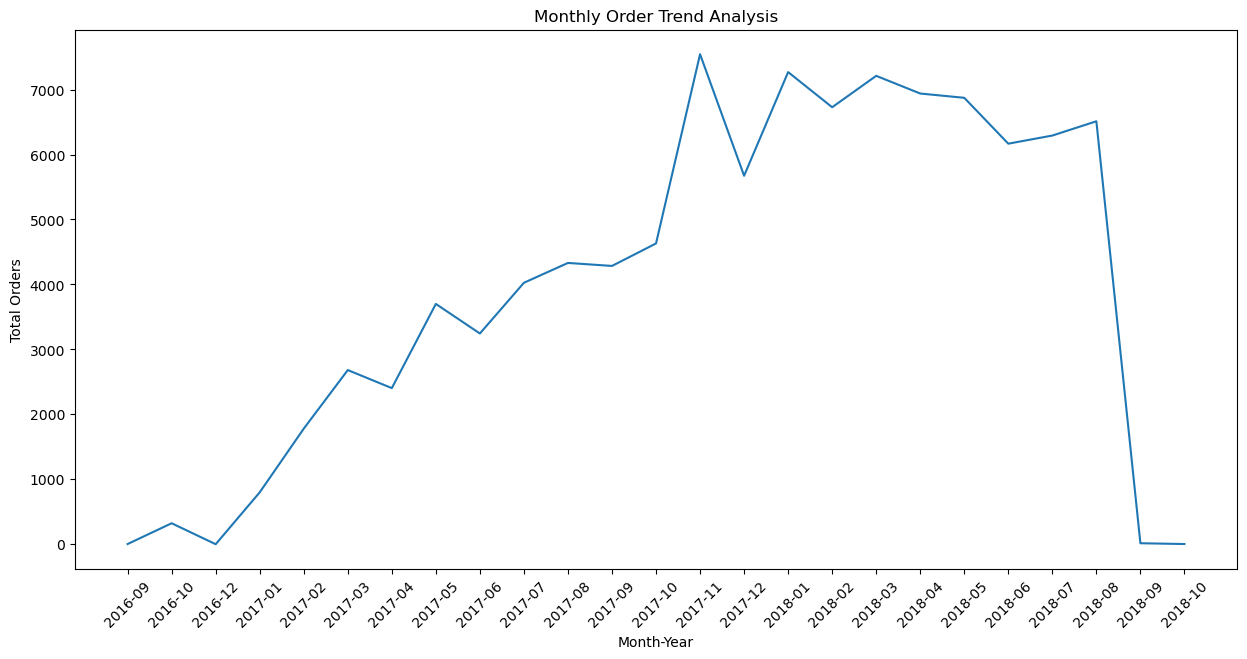

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Trend Analysis
plt.figure(figsize=(15, 7))
sns.lineplot(data=trend_df, x='month_year', y='total_orders')
plt.xticks(rotation=45)
plt.title('Monthly Order Trend Analysis')
plt.xlabel('Month-Year')
plt.ylabel('Total Orders')
plt.show()



Based on the provided line graph showing the trend in total orders over time, here's a critical analysis of how it might help identify potential problems or areas for business improvement:

Observations from the Graph:
Overall Increasing Trend: Initially, there is a general increasing trend in the number of orders from 2016-09 to the peak around 2018-07. This could indicate a period of business growth.

Fluctuations: There are noticeable fluctuations throughout the period. Some of these might correspond to seasonal patterns (like holidays or sales events), or they could indicate inconsistencies in marketing effectiveness or inventory levels.

Sharp Drops: There are sharp drops in orders at certain points, most notably at the end of the graph around 2018-09. Sharp drops may be due to external factors such as supply chain disruptions, website outages, changes in consumer behavior, or increased competition.

Abrupt Fall: The abrupt fall in orders at the end of the period is particularly concerning. If it's not an error in data (e.g., incomplete data for the last month), it could suggest a critical issue that needs immediate attention.

Potential Business Problems Identified:
Supply Chain Issues: The sharp drop may suggest issues with the supply chain. If the business cannot fulfill orders due to stockouts or delays from suppliers, this would directly impact order numbers.

Operational Challenges: If the business encountered operational challenges such as logistic failures or internal system breakdowns, these could manifest as abrupt declines in order volume.

Market Competition: The introduction of a new competitor or a change in market conditions (like a price war) could lead to a sudden loss of market share.

Customer Satisfaction: Issues with product quality, customer service, or delivery could lead to a decrease in repeat customers and a negative impact on new orders.

Seasonality Effects: The business needs to understand seasonal trends to anticipate and plan for fluctuations in order volume.

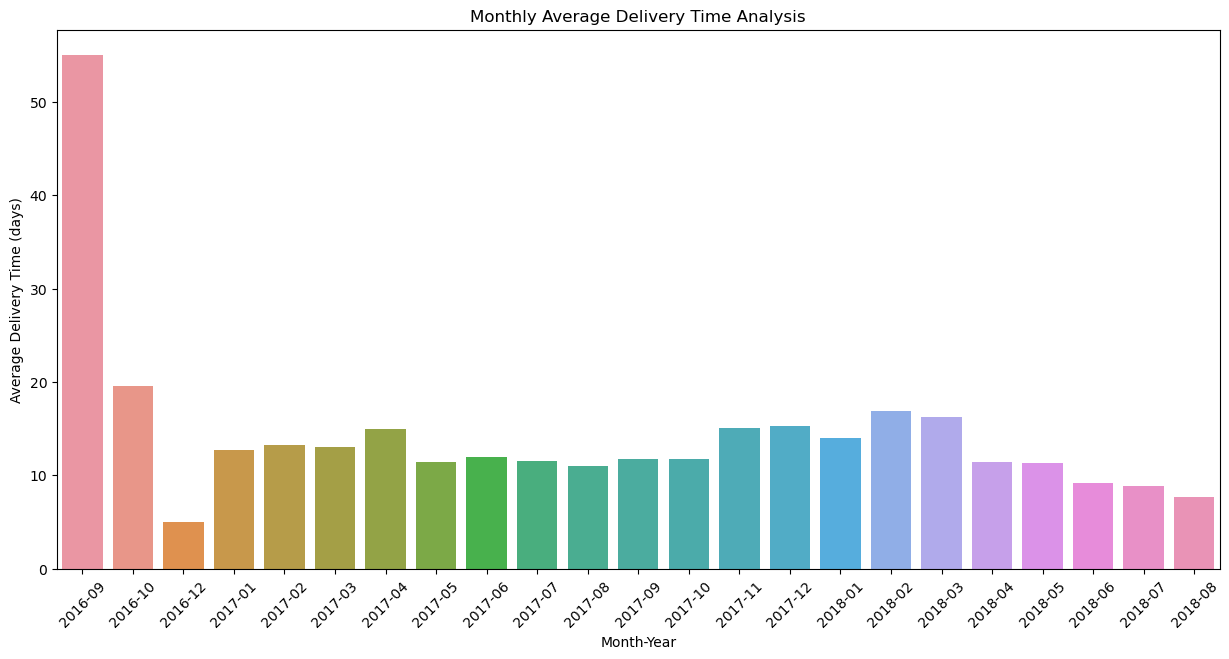

In [18]:
# Plotting Seasonality Analysis
plt.figure(figsize=(15, 7))
sns.barplot(data=seasonality_df, x='month_year', y='avg_delivery_time')
plt.xticks(rotation=45)
plt.title('Monthly Average Delivery Time Analysis')
plt.xlabel('Month-Year')
plt.ylabel('Average Delivery Time (days)')
plt.show()


In [28]:
query = """
SELECT 
    o.customer_id, 
    COUNT(o.order_id) AS order_count, 
    SUM(i.price) AS total_spent
FROM 
    orders_dataset o
JOIN 
    order_items_dataset i ON o.order_id = i.order_id
GROUP BY 
    o.customer_id
ORDER BY 
    total_spent DESC;
;
"""
df = pd.read_sql(query,conn)

/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_1632/1756139001.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


In [29]:
# Saving the DataFrame to a CSV file
csv_file_path = '/Users/smsultanmahmudrahat/Downloads/department/Cloud_computing/project/csv_files/archive/google_colab/customer_behavior.csv'  # Replace with your desired file path
df.to_csv(csv_file_path, index=False)

In [46]:
query2 = """
SELECT 
    g.geolocation_lat,
    g.geolocation_lng
FROM 
    orders_dataset o
JOIN 
    customers_dataset c ON o.customer_id = c.customer_id
JOIN 
    geolocation_dataset g ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
WHERE 
    o.order_status = 'delivered';

"""
df = pd.read_sql(query2,conn)

/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_1632/537640468.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query2,conn)


In [49]:
df.to_csv('/Users/smsultanmahmudrahat/Downloads/department/Cloud_computing/project/csv_files/archive/google_colab/query2.csv', index=False)

In [51]:
df.shape

(14654352, 2)

In [23]:
df.shape

(98666, 6)

In [27]:
# saving this df file as a csv file 


4. Operational Efficiency

Delivery Time Analysis: Evaluate average delivery times and identify outliers.

Vendor Performance: Assess the performance of sellers in terms of fulfillment and customer reviews.

Payment Method Preferences: Understand preferred payment methods and their impact on order completion rates.

In [41]:
query3= """
SELECT seller_id, AVG(review_score) AS avg_review_score, COUNT(order_id) AS orders_count
FROM order_reviews_dataset JOIN order_items_dataset ON order_reviews_dataset.order_id = order_items_dataset.order_id
GROUP BY seller_id;
"""
df = pd.read_sql(query3,conn)

/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_1632/1913030243.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query3,conn)


DatabaseError: Execution failed on sql '
SELECT seller_id, AVG(review_score) AS avg_review_score, COUNT(order_id) AS orders_count
FROM order_reviews_dataset JOIN order_items_dataset ON order_reviews_dataset.order_id = order_items_dataset.order_id
GROUP BY seller_id;
': (1052, "Column 'order_id' in field list is ambiguous")

In [40]:
df.head()

,customer_id,order_count,total_spent
0,1617b1357756262bfa56ab541c47bc16,8,13440.0
1,ec5b2ba62e574342386871631fafd3fc,4,7160.0
2,c6e2731c5b391845f6800c97401a43a9,1,6735.0
3,f48d464a0baaea338cb25f816991ab1f,1,6729.0
4,3fd6777bbce08a352fddd04e4a7cc8f6,1,6499.0


In [32]:
df.to_csv('/Users/smsultanmahmudrahat/Downloads/department/Cloud_computing/project/csv_files/archive/google_colab/query3.csv', index=False)